In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pywt
from scipy.io import loadmat

from tsfresh import extract_relevant_features

import os

In [48]:
# files = [f'waveforms/{f}' for f in os.listdir('waveforms') if 'HG8707' in f or 'HJ3311' in f]
# files = [f'waveforms/{f}' for f in os.listdir('waveforms') if 'clean' in f and 'diast' not in f and 'trended' not in f]

class epahClassifier():
    def __init__(self, waveforms=None, labels=None):
        self.waveforms = waveforms
        self.labels = labels
    
    def load_waveforms_from_files(self, files):
        # Load time series into DataFrame
        df_list = []
        for file in files:
            # Load ECG data from the downloaded MATLAB file
            mat = loadmat(file)
            file_id = file.split('.')[0]
            file_id = file_id.split('/')[-1]
            
            # For now, there are two types of files
            # - Files ending in '_000' only contain ONE waveform
            # - Files containing 'clean' may contain MULTIPLE waveforms
            if 'wave' in mat:
                # Note: Each file only contains ONE waveform!
                wave = mat['wave'][0][0][13][3]

                for i, x in enumerate(wave):
                    df_dict = {
                        'id':      file_id,
                        'time':    i,
                        'value':   wave[i],
                    }

                    df_list.append(df_dict)
                    
            elif 'savecleanforms' in mat:
                # Note: Each file may contain multiple waveforms!
                waves = mat['savecleanforms']['wave']
                
                # Create entries for each waveform in the mat file
                for wave_num, wave in enumerate(waves.item()[0]):
                    wave = wave[0]
                    
                    for i, x in enumerate(wave):
                        df_dict = {
                            'id':      f'{file_id}_{wave_num}',
                            'time':    i,
                            'value':   wave[i],
                        }
                        
                        df_list.append(df_dict)

        self.waveforms = pd.DataFrame(df_list)
    
    def load_labels_from_files(self, files):
        # Load labels into Data Series
        labels_dict = {}
        ind = []
        for file in files:
            file_id = file.split('_')[0]
            
            if mat.has_key('wave'):
                # Note: Each file only contains ONE waveform!
                labels_dict[file_id] = int(data[0] % 2)
                ind.append(file_id)
                
            elif mat.has_key('savecleanforms'):
                # Note: Each file may contain multiple waveforms!
                labels_dict[file_id] = int(data[0] % 2)
                ind.append(file_id)

        self.labels = pd.Series(labels_dict, index=ind)

In [49]:
epah = epahClassifier()

files = [f'waveforms/{f}' for f in os.listdir('waveforms') if 'clean' in f and 'diast' not in f and 'trended' not in f]

df_labels = pd.read_csv('labels.csv')
df_labels['File_Exists'] = [any(filename.split('_')[0] in f for f in filenames_from_folder) for filename in df_labels['Filename']]
df_labels['RHC_and_Exists'] = ~df_labels['RHC_or_CPET'] & df_labels['File_Exists']

df[df['RHC_and_Exists']]['Filename']

epah.load_waveforms_from_files(files)

In [62]:
id_list = list(epah.waveforms['id'])

labels_dict = {}
for file_id in id_list:
    labels_dict[file_id] = int(''.join([d for d in file_id.split('_')[0] if d.isnumeric()])) > 500

epah.labels = pd.Series(labels_dict, index=list(labels_dict.keys()))

In [63]:
features_filtered_direct = extract_relevant_features(epah.waveforms, epah.labels,
                                                     column_id='id', column_sort='time',
                                                     column_value='value')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [03:34<00:00,  7.16s/it]


In [64]:
features_filtered_direct

,"value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.4","value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4",value__lempel_ziv_complexity__bins_3,"value__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""min""","value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","value__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""","value__fft_coefficient__attr_""abs""__coeff_5","value__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""min""","value__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""","value__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""max""",...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_9,"value__fft_coefficient__attr_""real""__coeff_64","value__fft_coefficient__attr_""real""__coeff_67",value__symmetry_looking__r_0.2,"value__fft_coefficient__attr_""abs""__coeff_44","value__fft_coefficient__attr_""abs""__coeff_34","value__fft_coefficient__attr_""imag""__coeff_2","value__fft_coefficient__attr_""real""__coeff_97","value__fft_coefficient__attr_""abs""__coeff_61","value__fft_coefficient__attr_""real""__coeff_23"
EL1001_WAV_000cleanforms_0,0.358017,0.275600,0.140777,0.283163,0.282027,0.292789,163.610371,0.100152,0.101455,0.301554,...,0.077514,-3.513390,-3.134277,1.0,6.494887,4.879999,-429.747389,-3.300276,3.862589,-2.788877
EL1001_WAV_000cleanforms_1,0.387516,0.303943,0.129310,0.211144,0.317320,0.220600,314.370166,0.078031,0.079258,0.228761,...,0.087070,3.701144,4.241648,1.0,6.447922,11.533896,-511.558619,3.972160,6.050176,6.273865
EL1001_WAV_000cleanforms_2,0.352184,0.269440,0.125000,0.198151,0.284153,0.206803,306.109265,0.070929,0.072191,0.214898,...,0.109876,4.220125,4.148193,1.0,6.572206,13.013849,-482.371354,3.899857,4.656164,3.696318
EL1001_WAV_000cleanforms_3,0.364956,0.255423,0.127490,0.174202,0.271364,0.184228,268.029244,0.064591,0.066113,0.193975,...,0.172733,4.176493,5.890359,1.0,10.476863,9.376848,-617.735985,5.014168,7.244525,9.462231
EL1001_WAV_000cleanforms_4,0.411938,0.330717,0.127660,0.239895,0.314484,0.246668,272.690865,0.087165,0.087976,0.253272,...,0.132897,1.887608,2.125377,1.0,4.780214,3.755367,-550.391800,1.916741,3.587722,1.489806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HK502_WAV_026cleanforms_5,1.082869,1.568641,0.172932,1.150658,0.963741,1.254714,81.596712,0.445120,0.458658,1.322456,...,0.224881,9.557349,3.398664,1.0,11.661588,13.628686,-524.669313,4.421893,9.888826,10.645192
HK502_WAV_026cleanforms_6,0.730066,0.775594,0.157895,0.753976,0.568451,0.859543,111.014051,0.297784,0.312669,0.942574,...,0.112790,-3.370389,-3.610840,1.0,4.247849,5.812719,174.962416,4.421893,3.957974,-2.759593
HK502_WAV_026cleanforms_7,1.202013,1.950994,0.187500,1.120817,0.934776,1.278363,22.252580,0.446462,0.471013,1.414046,...,0.140917,3.316841,3.398664,1.0,0.400671,0.505905,-412.336888,4.421893,5.144394,0.117086
HK502_WAV_026cleanforms_8,1.276723,1.960815,0.155689,0.961408,0.923399,1.016856,181.703781,0.342402,0.349909,1.058491,...,0.005483,-7.472345,-7.254546,1.0,9.856248,12.784715,-675.961145,4.421893,8.329261,-5.165281


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from tsfresh.transformers import RelevantFeatureAugmenter
from tsfresh.utilities.dataframe_functions import impute

In [69]:
y = epah.labels

X = pd.DataFrame(index=y.index)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [70]:
ppl = Pipeline([
        ('augmenter', RelevantFeatureAugmenter(column_id='id', column_sort='time')),
        ('classifier', RandomForestClassifier())
      ])

In [71]:
ppl.set_params(augmenter__timeseries_container=epah.waveforms)

Pipeline(steps=[('augmenter',
                 RelevantFeatureAugmenter(column_id='id', column_sort='time',
                                          timeseries_container=                                 id  time      value
0        EL1001_WAV_000cleanforms_0     0 -11.173748
1        EL1001_WAV_000cleanforms_0     1 -11.073518
2        EL1001_WAV_000cleanforms_0     2 -10.913289
3        EL1001_WAV_000cleanforms_0     3 -10.673059
4        EL1001_WAV_000cleanforms_0     4 -10.372829
...                             ...   ...        ...
1260554  HK502_WAV_026cleanforms_11   107 -25.017159
1260555  HK502_WAV_026cleanforms_11   108 -24.558078
1260556  HK502_WAV_026cleanforms_11   109 -24.098997
1260557  HK502_WAV_026cleanforms_11   110 -23.639916
1260558  HK502_WAV_026cleanforms_11   111 -23.180835

[1260559 rows x 3 columns])),
                ('classifier', RandomForestClassifier())])

In [72]:
ppl.fit(X_train, y_train)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [03:40<00:00,  7.36s/it]
C:\Users\andre\miniconda3\envs\epahClassification\lib\site-packages\tsfresh\utilities\dataframe_functions.py:171: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


Pipeline(steps=[('augmenter',
                 RelevantFeatureAugmenter(column_id='id', column_sort='time',
                                          timeseries_container=                                 id  time      value
0        EL1001_WAV_000cleanforms_0     0 -11.173748
1        EL1001_WAV_000cleanforms_0     1 -11.073518
2        EL1001_WAV_000cleanforms_0     2 -10.913289
3        EL1001_WAV_000cleanforms_0     3 -10.673059
4        EL1001_WAV_000cleanforms_0     4 -10.372829
...                             ...   ...        ...
1260554  HK502_WAV_026cleanforms_11   107 -25.017159
1260555  HK502_WAV_026cleanforms_11   108 -24.558078
1260556  HK502_WAV_026cleanforms_11   109 -24.098997
1260557  HK502_WAV_026cleanforms_11   110 -23.639916
1260558  HK502_WAV_026cleanforms_11   111 -23.180835

[1260559 rows x 3 columns])),
                ('classifier', RandomForestClassifier())])

In [73]:
y_pred = ppl.predict(X_test)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [00:53<00:00,  1.79s/it]


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.74      0.53      0.62       610
        True       0.78      0.90      0.83      1105

    accuracy                           0.77      1715
   macro avg       0.76      0.72      0.73      1715
weighted avg       0.77      0.77      0.76      1715



In [ ]:
ppl.named_steps["augmenter"].feature_selector.relevant_features

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [00:53<00:00,  1.78s/it]


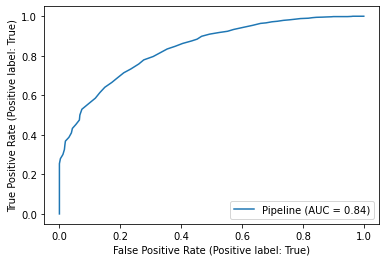

In [79]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(ppl, X_test, y_test)